In [235]:
import numpy as np 
import matplotlib.pyplot as plt

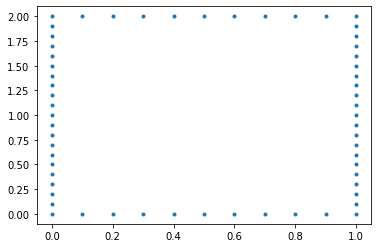

In [236]:
dx = 0.1
#interior points
x,z = np.meshgrid(np.arange(0,1+dx,dx),np.arange(0,2+dx,dx))
n = x.shape[0]
m = x.shape[1]

ni = n-2
mi = m-2
xi = x[1:-1,1:-1].reshape((ni*mi,1))
zi = z[1:-1,1:-1].reshape((ni*mi,1))



xo = np.zeros((n*2 + 2*(m-2),1))
zo = np.zeros((n*2 + 2*(m-2),1))
xo[0:n,0] = x[:,0]
zo[0:n,0] = z[:,0]

xo[n:2*n,0] = x[:,-1]
zo[n:2*n,0] = z[:,-1]

xo[2*n:2*n+m-2,0] = x[0,1:-1]
zo[2*n:2*n+m-2,0] = z[0,1:-1]
xo[2*n+m-2:,0] = x[-1,1:-1]
zo[2*n+m-2:,0] = z[-1,1:-1]

X = np.concatenate((xi,xo))
Z = np.concatenate((zi,zo))
plt.plot(xo,zo,'.')




In [237]:
#defining thin plate spline

def phi(x_i,z_i,x_j,z_j,a):
    eps = 1e-6
    r = np.sqrt((x_i-x_j)**2 + (z_i-z_j)**2)
    
    return np.exp(-(a*r)**2)



In [238]:
#second derivative
def nabla2(xi,zi,xj,zj,a):
    eps = 1e-6
    return 4*a**2*(a**2*(xi - xj)**2 + a**2*(zi - zj)**2 - 1)*np.exp(-a**2*((xi - xj)**2 + (zi - zj)**2))

In [239]:
#testing:
phi_mat = np.zeros((n*m,n*m))
nab2phi_mat = np.zeros((n*m,n*m))
a = 1/dx
for i in range(0,n*m):
    for j in range(0,n*m):
        phi_mat[i,j] = phi(X[i,0],Z[i,0],X[j,0],Z[j,0],a)
        nab2phi_mat[i,j] = nabla2(X[i,0],Z[i,0],X[j,0],Z[j,0],a)
        if np.isnan(nab2phi_mat[i,j]):
            nab2phi_mat[i,j] = 0



In [240]:

f_x = np.sin(100*X)
d2f = -10000*np.sin(100*X)
f_j = np.linalg.solve(phi_mat,f_x)


In [241]:
d2f_test = np.matmul(nab2phi_mat,f_j)

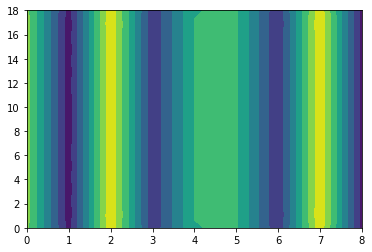

In [242]:
plt.contourf(d2f_test[0:ni*mi,0].reshape((ni,mi)))


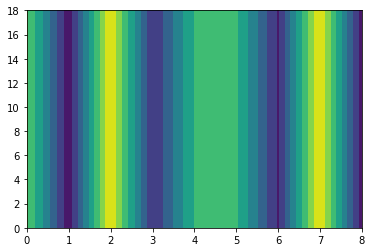

In [243]:
plt.contourf(d2f[0:ni*mi,0].reshape((ni,mi)))